<a href="https://colab.research.google.com/github/SulavShrestha265/covid-19-data/blob/master/COVID19_Predictions_Final_15102020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the required Packages and Libraries

In [2]:
import warnings #exceptions are used as warning categories
warnings.filterwarnings('ignore')
import pandas as pd #for dataset handling
import matplotlib.pyplot as plt #for visualization (Planting Graphs)
import seaborn as sns #for data visualisation based on matplotlib
!pip install plotly #for interactive plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np #Support for Pandas and calculations
import datetime as dt #for date time
from datetime import timedelta
from sklearn.model_selection import GridSearchCV #sklearn features various classification, regression and clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm #for providing classes and functions for estimation of different statistical models
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet #for machie learning forecasting
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
!pip install pyramid-arima #for statistical modeling
from pyramid.arima import auto_arima
std=StandardScaler()

px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody




     |████████████████████████████████| 604kB 3.4MB/s 


In [3]:
covid=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/covid_19_data.csv.zip")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Checking the Dataset


In [5]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (116805, 8)
Checking for null values:
 SNo                    0
ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [6]:
#Removing SNo cloumn as well as droping "Province/State" as it has too many Null values
covid.drop(["SNo"],1,inplace=True)

In [7]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [8]:
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [9]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

In [10]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (116805, 7)
Checking for null values:
 ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type of each column:
 ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object


Datewise Analysis

In [11]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [12]:
print("Basic Information")
print("Total number of Countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
Total number of Countries with Disease Spread:  223
Total number of Confirmed Cases around the World:  31779835.0
Total number of Recovered Cases around the World:  21890442.0
Total number of Deaths Cases around the World:  975104.0
Total number of Active Cases around the World:  8914289.0
Total number of Closed Cases around the World:  22865546.0
Approximate number of Confirmed Cases per Day around the World:  129186.0
Approximate number of Recovered Cases per Day around the World:  88986.0
Approximate number of Death Cases per Day around the World:  3964.0
Approximate number of Confirmed Cases per hour around the World:  5383.0
Approximate number of Recovered Cases per hour around the World:  3708.0
Approximate number of Death Cases per hour around the World:  165.0
Number of Confirmed Cases in last 24 hours:  262748.0
Number of Recovered Cases in last 24 hours:  266008.0
Number of Death Cases in last 24 hours:  5526.0


In [13]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Number of Active Cases Distribution",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases


In [14]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Number of Closed Cases Distribution",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

Closed Cases = Number of Recovered Cases + Number of Death Cases


In [15]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases', fill='tozeroy'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases', fill='tozeroy'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases', fill='tozeroy'))

fig.update_layout(title="Weekly Growth COVID-19 Globally",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Text(0.5, 1.0, 'Weekly increase in Number of Death Cases')

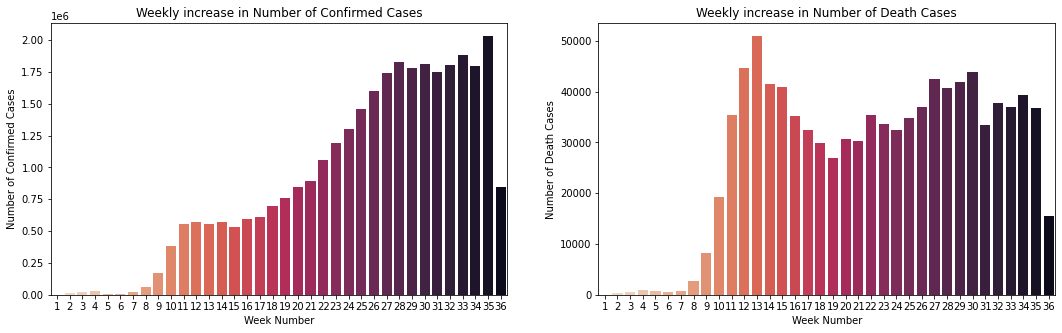

In [16]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(18,5))


sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1, palette='rocket_r')
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2,  palette='rocket_r')
sns.set_palette("rocket_r")

ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")


As 36th Week is going on we can omete this data. 
The number of Confirmed cases is increasing every week. 

In [17]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))

fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Mortality and Recovery Rate analysis around the World

In [18]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Recovered"]/datewise["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Deaths"]/datewise["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Average Mortality Rate 4.489434703521251
Median Mortality Rate 4.13538370495493
Average Recovery Rate 42.03177180081855
Median Recovery Rate 45.82947437974793


Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
Mortality rate is showing a considerable for a pretty long time, which is positive sign
Recovery Rate has started to pick up again which is a good sign, another supportive reason to why number of Closed Cases are increasing


In [19]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))

fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average increase in number of Confirmed Cases every day:  129184.0
Average increase in number of Recovered Cases every day:  88985.0
Average increase in number of Deaths Cases every day:  3964.0


In [20]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Death Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"].diff().rolling(window=7).mean(),mode='lines+markers',
                    name='Recovered Cases'))

fig.update_layout(title="7 Days Rolling Mean of Daily Increase of Confirmed, Recovered and Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Growth Factor
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.

A growth factor above 1 indicates an increase correspoding cases.

A growth factor above 1 but trending downward is a positive sign, whereas a growth factor constantly above 1 is the sign of exponential growth.

A growth factor constant at 1 indicates there is no change in any kind of cases.


In [21]:
print("Average growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).mean())
print("Median growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).median())
print("Average growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).mean())
print("Median growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).median())
print("Average growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).mean())
print("Median growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).median())

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"]/datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"]/datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"]/datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

Average growth factor of number of Confirmed Cases:  1.0489392086912515
Median growth factor of number of Confirmed Cases:  1.0190141239355301
Average growth factor of number of Recovered Cases:  1.060396226808128
Median growth factor of number of Recovered Cases:  1.0282038522334758
Average growth factor of number of Death Cases:  1.0486207544288597
Median growth factor of number of Death Cases:  1.0131569697634333


Growth Factor for Active and Closed Cases
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

Formula: Every day's new (Active and Closed Cases) / new (Active and Closed Cases) on the previous day.

A growth factor above 1 indicates an increase correspoding cases.

A growth factor above 1 but trending downward is a positive sign.

A growth factor constant at 1 indicates there is no change in any kind of cases.

A growth factor below 1 indicates real positive sign implying more patients are getting recovered or dying as compared to the Confirmed Cases.


In [22]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, 
                         y=(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])/(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=(datewise["Recovered"]+datewise["Deaths"])/(datewise["Recovered"]+datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

Rate of Doubling for Confirmend Cases around the World


In [23]:
c=560
double_days=[]
C=[]
while(1):
    double_days.append(datewise[datewise["Confirmed"]<=c].iloc[[-1]]["Days Since"][0])
    C.append(c)
    c=c*2
    if(c<datewise["Confirmed"].max()):
        continue
    else:
        break

In [24]:
doubling_rate=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first Case"])
doubling_rate["Number of days for doubling"]=doubling_rate["Days since first Case"].diff().fillna(doubling_rate["Days since first Case"])
doubling_rate

,No. of cases,Days since first Case,Number of days for doubling
0,560,0 days,0 days
1,1120,2 days,2 days
2,2240,4 days,2 days
3,4480,5 days,1 days
4,8960,8 days,3 days
5,17920,11 days,3 days
6,35840,16 days,5 days
7,71680,25 days,9 days
8,143360,50 days,25 days
9,286720,58 days,8 days


Number of days requried for increase in Confirmed Cases by 300K


In [25]:
c1=100000
days_300k=[]
C1=[]
while(1):
    days_300k.append(datewise[datewise["Confirmed"]<=c1].iloc[[-1]]["Days Since"][0])
    C1.append(c1)
    c1=c1+300000
    if(c1<datewise["Confirmed"].max()):
        continue
    else:
        break

In [26]:
rate_300k=pd.DataFrame(list(zip(C1,days_300k)),columns=["No. of Cases","Days Since first Case"])
rate_300k["Days requried for rise of 300K"]=rate_300k["Days Since first Case"].diff().fillna(rate_300k["Days Since first Case"].iloc[[0]][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=rate_300k["No. of Cases"], y=rate_300k["Days requried for rise of 300K"].dt.days,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.update_layout(title="Number of Days required for increase in number of cases by 300K",
                 xaxis_title="Number of Cases",yaxis_title="Number of Days")
fig.show()

It's hardly taking a day or two for rise in cases by 300k, which is pretty much a clear indication that we are still not able to "Flatten the curve"

Countrywise Analysis


In [27]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [28]:
country_last_24_confirmed=[]
country_last_24_recovered=[]
country_last_24_deaths=[]
for country in countrywise.index:
    country_last_24_confirmed.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Deaths"])

In [29]:
Last_24_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_24_confirmed,country_last_24_recovered,country_last_24_deaths)),
                                   columns=["Country Name","Last 24 Hours Confirmed","Last 24 Hours Recovered","Last 24 Hours Deaths"])

Text(0.5, 1.0, 'Top 15 Countries with Highest Number of Death Cases in Last 24 Hours')

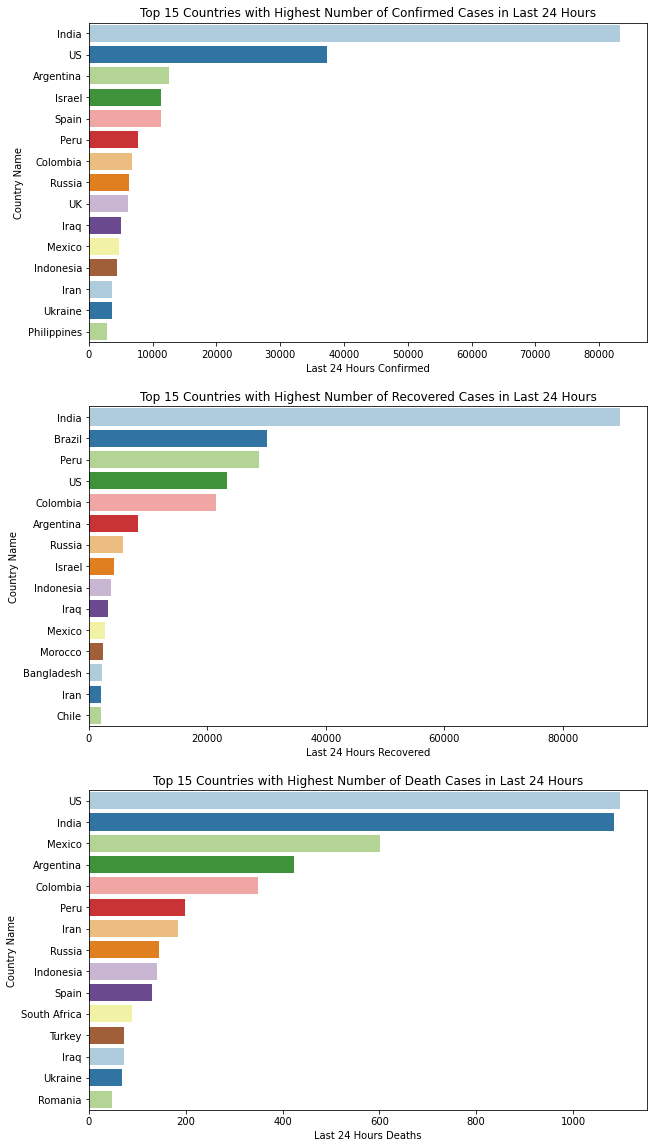

In [30]:
Top_15_Confirmed_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"],ascending=False).head(15)
Top_15_Recoverd_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"],ascending=False).head(15)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
sns.barplot(x=Top_15_Confirmed_24hr["Last 24 Hours Confirmed"],y=Top_15_Confirmed_24hr["Country Name"],ax=ax1,  palette='Paired')
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")
sns.barplot(x=Top_15_Recoverd_24hr["Last 24 Hours Recovered"],y=Top_15_Recoverd_24hr["Country Name"],ax=ax2, palette='Paired')
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")
sns.barplot(x=Top_15_Deaths_24hr["Last 24 Hours Deaths"],y=Top_15_Deaths_24hr["Country Name"],ax=ax3, palette='Paired')
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours")

In [31]:
Last_24_Hours_country["Proportion of Confirmed"]=(Last_24_Hours_country["Last 24 Hours Confirmed"]/(datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Recovered"]=(Last_24_Hours_country["Last 24 Hours Recovered"]/(datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Deaths"]=(Last_24_Hours_country["Last 24 Hours Deaths"]/(datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2]))*100

Proportion of Countries in Confirmed, Recovered and Death Cases

In [32]:
Last_24_Hours_country[["Country Name","Proportion of Confirmed","Proportion of Recovered","Proportion of Deaths"]].sort_values(["Proportion of Confirmed"],ascending=False).style.background_gradient(cmap="Reds")

,Country Name,Proportion of Confirmed,Proportion of Recovered,Proportion of Deaths
1,India,31.721269,33.738083,19.634455
0,US,14.207530,8.758007,19.869707
9,Argentina,4.804984,3.104418,7.672819
23,Israel,4.306788,1.583411,0.723851
7,Spain,4.296512,0.000000,2.352515
5,Peru,2.911916,10.771105,3.601158
4,Colombia,2.561770,8.036224,6.315599
3,Russia,2.409152,2.134898,2.623959
13,UK,2.354728,0.003383,0.000000
15,Iraq,1.923897,1.214625,1.302932


Text(0.5, 1.0, 'Top 15 countries as per Number of Recovered Cases')

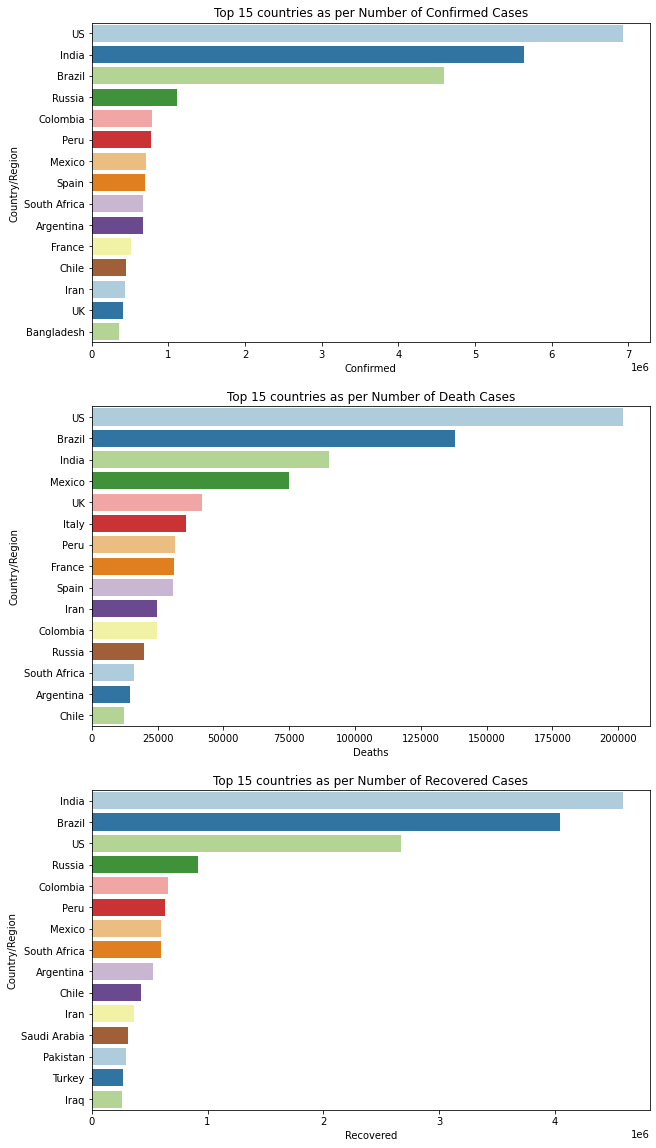

In [33]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(10,20))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
top_15_recovered=countrywise.sort_values(["Recovered"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1, palette='Paired')
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2, palette='Paired')
ax2.set_title("Top 15 countries as per Number of Death Cases")
sns.barplot(x=top_15_recovered["Recovered"],y=top_15_recovered.index,ax=ax3, palette='Paired')
ax3.set_title("Top 15 countries as per Number of Recovered Cases")


Top 25 Countries as per Mortatlity Rate and Recovery Rate with more than 500 Confirmed Cases

Text(0.5, 0, 'Recovery (in %)')

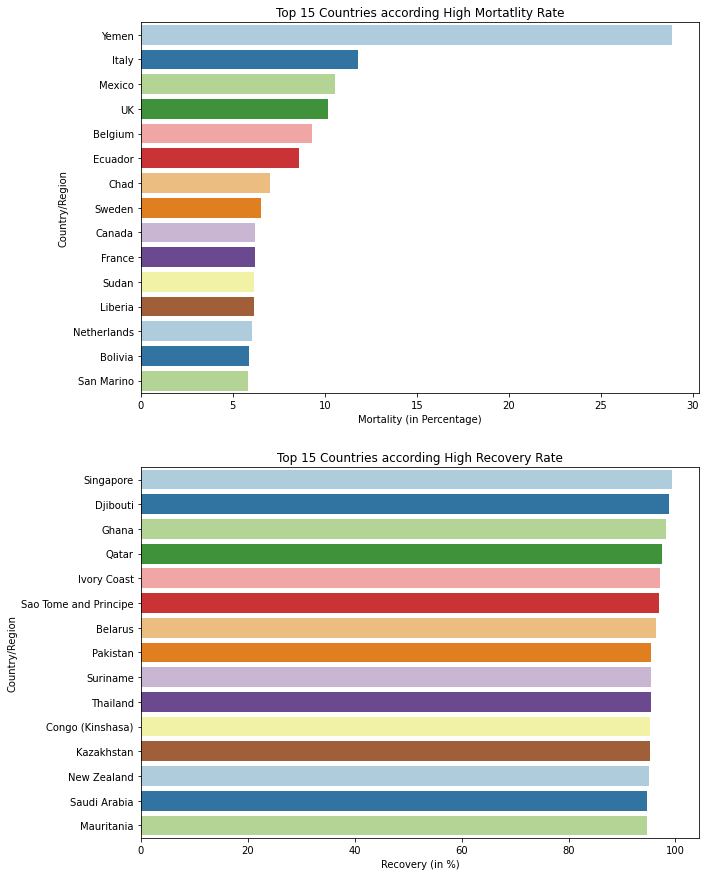

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1, palette='Paired')
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2, palette='Paired')
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in %)")

Recovery in Percentage

Text(0.5, 0, 'Recovery (in %)')

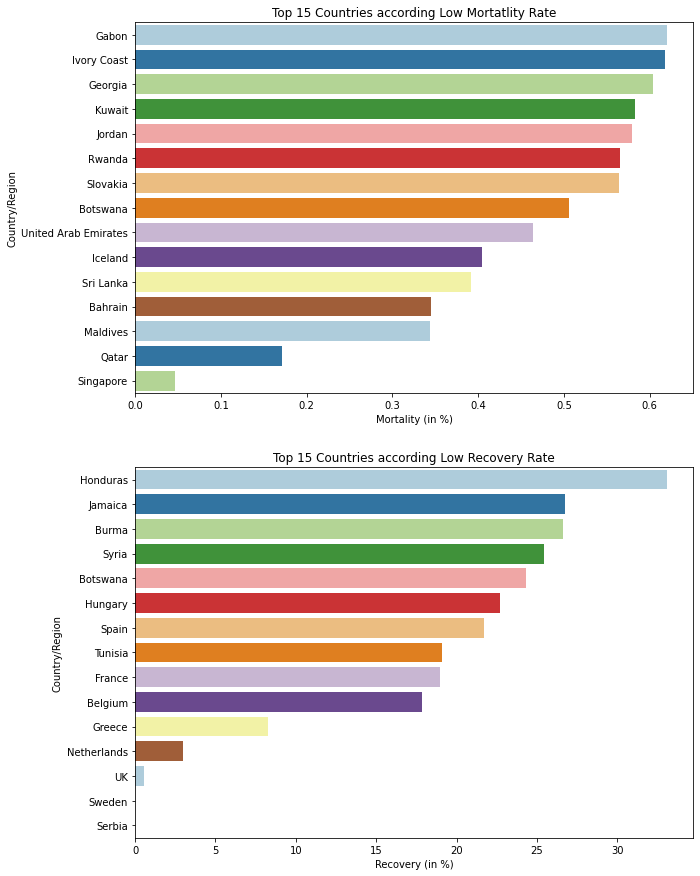

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1, palette='Paired')
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in %)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2, palette='Paired')
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in %)")

No Recovered Patients with cnsiderable Mortality Rate

In [36]:
no_recovered_countries=countrywise[(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries=no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)
no_recovered_countries.style.background_gradient('Reds')

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
MS Zaandam,9.000000,2.000000,22.222222
Sweden,89756.000000,5876.000000,6.546638
Serbia,33080.000000,744.000000,2.249093


It is strange to see that MS Zaandam, Sweden and Serbia do not have any recovery given it's high mortality rates.


Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate

In [37]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths=no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False).drop(["Mortality"],1)
no_deaths.style.background_gradient(cmap="Reds")

,Confirmed,Recovered,Deaths,Recovery
Country/Region,,,,
Cambodia,275.000000,274.000000,0.000000,99.636364
Mongolia,313.000000,302.000000,0.000000,96.485623
Seychelles,143.000000,136.000000,0.000000,95.104895
Eritrea,364.000000,309.000000,0.000000,84.890110
Bhutan,261.000000,196.000000,0.000000,75.095785


Some of the countries that are doing really well for them selves are Cambodia, mangolia, Seychelles, Eritea, and Bhutan. Cambodia and Mongolia could be very soon free from COVID-19.

Top 15 Countries with the Most Active and Closed Cases

Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

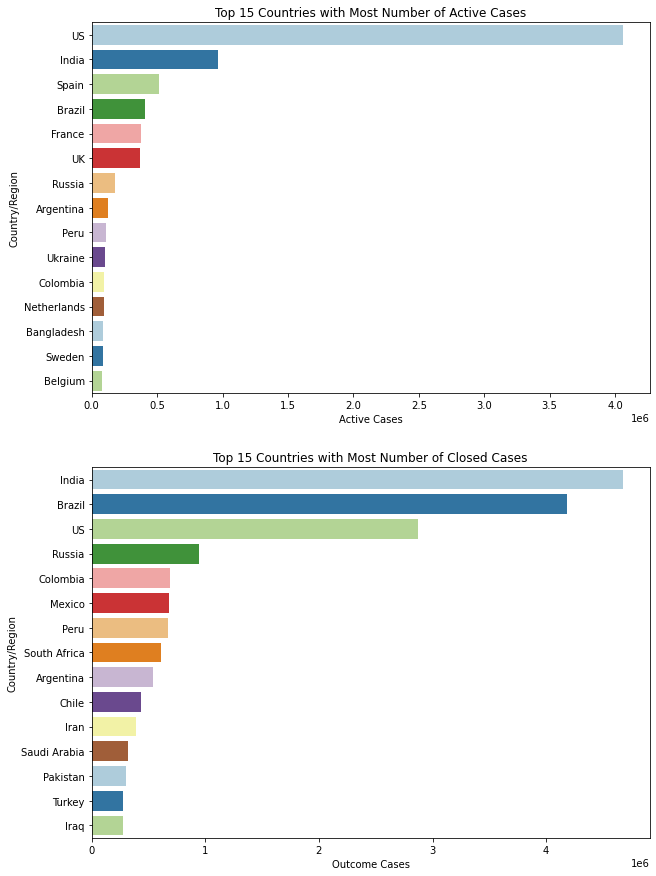

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1, palette='Paired')
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2, palette='Paired')
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

In [39]:
country_date=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for country in countrywise.index:
    days=country_date.loc[country].shape[0]
    confirm_rate.append((countrywise.loc[country]["Confirmed"])/days)
countrywise["Confirm Cases/Day"]=confirm_rate

Text(0.5, 1.0, 'Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases')

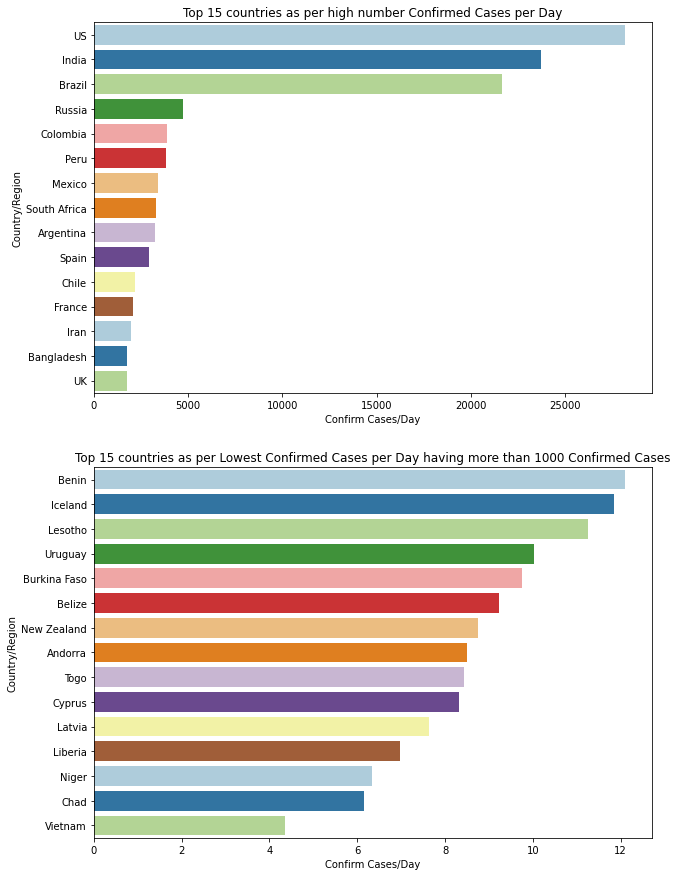

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
top_15_ccpd=countrywise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1, palette='Paired')
ax1.set_title("Top 15 countries as per high number Confirmed Cases per Day")
bottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2, palette='Paired')
ax2.set_title("Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases")

Confirmed Cases/Day is clear indication of why US has highest number of Active Cases currently. The rate is 11000+ cases per day. Showing increase in that value every day.

Mean Survival Probability across all countries 97.31458757782508
Median Survival Probability across all countries 97.98383360602531
Mean Death Probability across all countries 2.6854124221749203
Median Death Probability across all countries 2.016166393974686


Text(0.5, 1.0, 'Bottom 15 Countries as per Survival Probability')

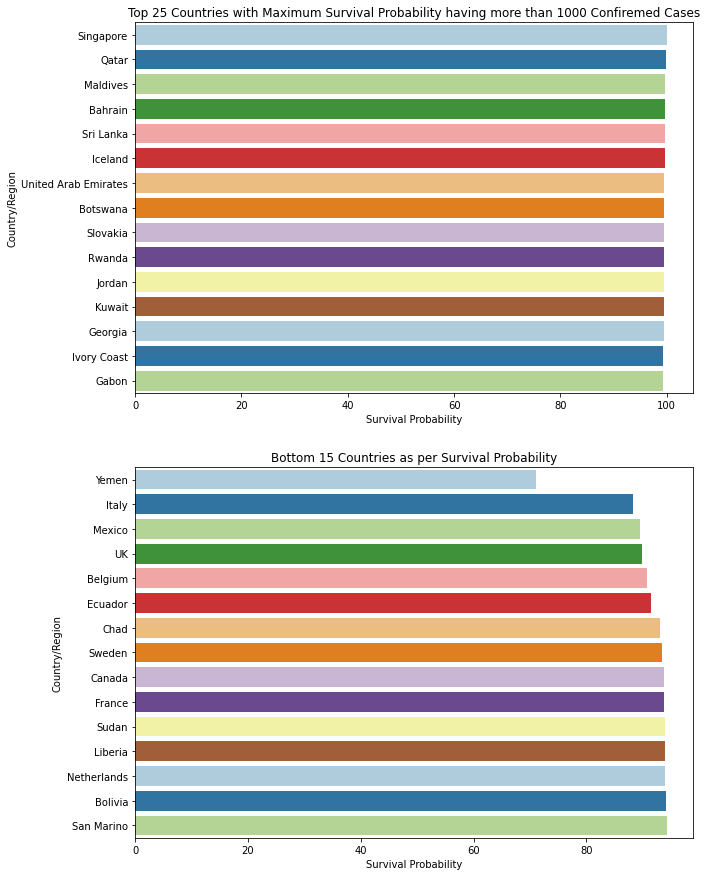

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
sns.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1, palette='Paired')
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries',countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries',countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries',100-countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries',100-countrywise["Survival Probability"].median())

Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
sns.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2, palette='Paired')
plt.title("Bottom 15 Countries as per Survival Probability")

Survival Probability is the only graph that looks the most promising! Having average survival probability of 95%+ across all countries. The difference between Mean and Median Death Probability is an clear indication that there few countries with really high mortality rate e.g. Yemen, Italy, Mexico, UK etc

#Journey of different Countries in COVID-19
When we see daily news reports on COVID-19 it's really hard to interpret what's actually happening, since the numbers are changing so rapidly but that's something expected from Exponential growth. Since almost all the pandemics tend to grow exponentially it's really hard to understand for someone from a non-mathematical or non-statistical background.
We are more concerned about how we are doing and where we are heading in this pandemic rather than just looking at those exponentially growing numbers. The growth won't be exponentially forever, at some point of time the curve will become flat because probably all the people on the planet are infected or we human have been able to control the disease.¶
When we are in the middle of the exponential growth it's almost impossible to tell where are we heading.
Here, I am trying to show how we can interpret the exponential growth which is the common trend among all the countries

References: How To Tell If We're Beating COVID-19: https://www.youtube.com/watch?v=54XLXg4fYsc

Exponential growth and epidemics: https://www.youtube.com/watch?v=Kas0tIxDvrg

In [42]:
fig=go.Figure()
for country in countrywise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country]["log_confirmed"], y=grouped_country.loc[country]["log_active"],
                    mode='lines',name=country))
fig.update_layout(height=600,title="COVID-19 Journey of Top 15 Worst Affected Countries",
                 xaxis_title="Confirmed Cases (Logrithmic Scale)",yaxis_title="Active Cases (Logarithmic Scale)",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

It's pretty evident that the disease is spreading in same manner everywhere, but if particular country is following pandemic controlling practices rigrously the results are evident in the graph.

Most of the countries will follow the same trajectory as that USA, which is "Uncontrolled Exponential Growth"

There are few countries where the pandemic controlling practices seems to be working accurately, few classic examples are China, Germany, Italy, Spain, Turkey has started showing that dip indicating there are somehow got control over COVID-19

Countries like United Kingdom, Russia are following similar lines as that of United States, indicating the growth is still exponential among those countries.

In [43]:
fig=go.Figure()
for country in countrywise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, y=grouped_country.loc[country]["Confirmed"].rolling(window=7).mean().diff(),
                    mode='lines',name=country))
fig.update_layout(height=600,title="7 Days Rolling Average of Daily increase of Confirmed Cases",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

India is incresing more rapidly than USA at the current moment. 

In [44]:
fig=go.Figure()
for country in countrywise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, 
                             y=grouped_country.loc[country]["Deaths"].rolling(window=7).mean().diff(),
                    mode='lines',name=country))
fig.update_layout(height=600,title="7 Days Rolling Average of Daily increase of Death Cases",
                 xaxis_title="Date",yaxis_title="Death Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

The death increase was huge in the month of May. Similarly it is increasing exponentially for India.

In [45]:
fig=go.Figure()
for country in countrywise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, 
                             y=grouped_country.loc[country]["Recovered"].rolling(window=7).mean().diff(),
                    mode='lines',name=country))
fig.update_layout(height=600,title="7 Days Rolling Average of Daily increase of Recovered Cases",
                 xaxis_title="Date",yaxis_title="Recovered Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#Clustering of Countries
The clustering of countries can be done considering different features. Here I'm trying to cluster different countries based on the Mortality and Recovery rate of indivisual country.

As we all are well aware that COVID-19 has different Mortality Rate among different countries based on different factors and so is the Recovery Rate because of pandemic controlling practices followed by the individual country. Also Mortality Rate and Recovery Rate both togther takes into account all types of cases Confirmed, Recoverd and Deaths.



In [46]:
X=countrywise[["Mortality","Recovery"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 

In [47]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

In [48]:
#Clusters are a really good way to segregate similar countries using Within Cluster Sum of Squares (WCSS) and Elbow method. This way we can check which country group are doing better than others.

Text(0.5, 1.0, 'Elbow Method')

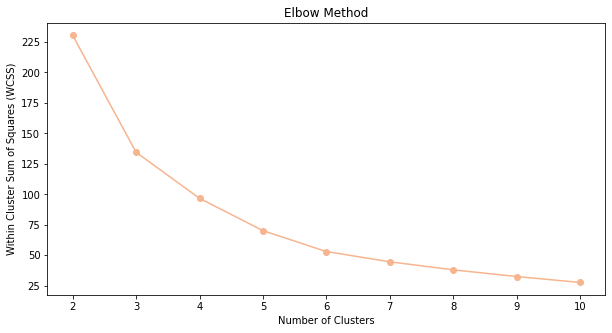

In [49]:
x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")

From the figure we can see that 3 Clusters would be good to start with.


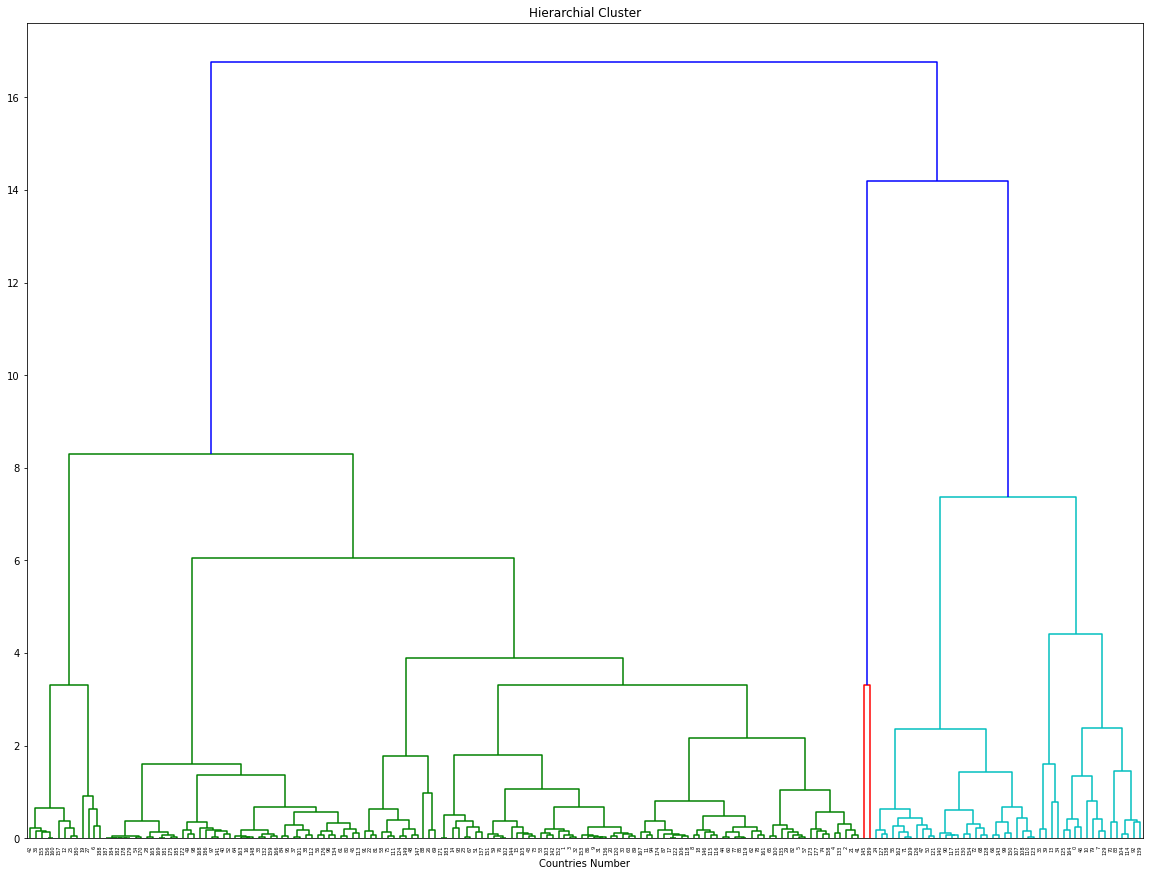

In [173]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
plt.xlabel("Countries Number")
plt.title("Hierarchial Cluster")
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

Een Hierarchical Clustering shows k=3 is the bestt number of clusters.

In [51]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [52]:
countrywise["Clusters"]=clf_final.predict(X)

Summary of Clusters

In [53]:
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1].head(15),countrywise[countrywise["Clusters"]==2].head(15),countrywise[countrywise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Active Cases,Outcome Cases,Confirm Cases/Day,Survival Probability,Clusters
Country/Region,,,,,,,,,,
US,6933548.00,2670256.00,201884.00,2.91,38.51,4061408.00,2872140.00,28185.15,97.09,1.00
Spain,693556.00,150376.00,31034.00,4.47,21.68,512146.00,181410.00,2938.80,95.53,1.00
France,508456.00,96498.00,31447.00,6.18,18.98,380511.00,127945.00,2083.84,93.82,1.00
UK,412245.00,2247.00,41951.00,10.18,0.55,368047.00,44198.00,1739.43,89.82,1.00
Ukraine,189488.00,84767.00,3784.00,2.00,44.73,100937.00,88551.00,924.33,98.00,1.00
Belgium,106887.00,19079.00,9959.00,9.32,17.85,77849.00,29038.00,458.74,90.68,1.00
Netherlands,105304.00,3143.00,6344.00,6.02,2.98,95817.00,9487.00,501.45,93.98,1.00
Sweden,89756.00,0.00,5876.00,6.55,0.00,83880.00,5876.00,378.72,93.45,1.00
Honduras,72675.00,24022.00,2222.00,3.06,33.05,46431.00,26244.00,368.91,96.94,1.00


In [54]:
print("Average Mortality Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Mortality"].mean())
print("Average Recovery Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Recovery"].mean())
print("Average Mortality Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Mortality"].mean())
print("Average Recovery Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Recovery"].mean())
print("Average Mortality Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Mortality"].mean())
print("Average Recovery Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Recovery"].mean())

Average Mortality Rate of Cluster 0:  2.310616220854169
Average Recovery Rate of Cluster 0:  84.92226038488003
Average Mortality Rate of Cluster 1:  2.9288428756901457
Average Recovery Rate of Cluster 1:  35.86523191913666
Average Mortality Rate of Cluster 2:  25.55172224960298
Average Recovery Rate of Cluster 2:  30.680137999014296


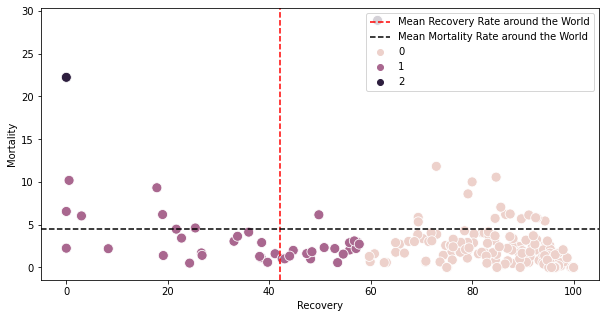

In [55]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Recovery"],y=countrywise["Mortality"],hue=countrywise["Clusters"],s=100)
plt.axvline(((datewise["Recovered"]/datewise["Confirmed"])*100).mean(),
            color='red',linestyle="--",label="Mean Recovery Rate around the World")
plt.axhline(((datewise["Deaths"]/datewise["Confirmed"])*100).mean(),
            color='black',linestyle="--",label="Mean Mortality Rate around the World")
plt.legend()

In [56]:
print("Few Countries belonging to Cluster 0: ",list(countrywise[countrywise["Clusters"]==0].head(10).index))
print("Few Countries belonging to Cluster 1: ",list(countrywise[countrywise["Clusters"]==1].head(10).index))
print("Few Countries belonging to Cluster 2: ",list(countrywise[countrywise["Clusters"]==2].head(10).index))

Few Countries belonging to Cluster 0:  ['India', 'Brazil', 'Russia', 'Colombia', 'Peru', 'Mexico', 'South Africa', 'Argentina', 'Chile', 'Iran']
Few Countries belonging to Cluster 1:  ['US', 'Spain', 'France', 'UK', 'Ukraine', 'Belgium', 'Netherlands', 'Sweden', 'Honduras', 'Ethiopia']
Few Countries belonging to Cluster 2:  ['Yemen', 'MS Zaandam']


Cluster 2 is a set of countries which have really High Mortality Rate and consdierably Good Recovery Rate. Basically few countries among these clusters have seen already the worst of this pandemic but are now recovering with healty Recovery Rate.

Cluster 0 is set of countries which have Low Mortality Rate and really High Recovery Rate. These are the set of countries who has been able to control the COVID-19 by following pandemic controlling practices rigorously.

Cluster 1 is set of countries which have Low Mortality Rate and really Low Recovery Rate. These countries need to pace up their Revovery Rate to get out it, Some thses countries have really high number of Infected Cases but Low Mortality is positive sign out of it.

#Comparision of USA, Australia, Italy, India and Nepal

USA: The highest death and spread

Australia: Our Country

Italy: Control of the spread

India: Spread after lockdown

Nepal: Underdeveloped country battling with the Pandemic


In [57]:
India_data=covid[covid["Country/Region"]=="India"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
Australia_data=covid[covid["Country/Region"]=="Australia"]
Nepal_data=covid[covid["Country/Region"]=="Nepal"]
rest_of_world=covid[(covid["Country/Region"]!="India")&(covid["Country/Region"]!="Italy")&(covid["Country/Region"]!="US")&(covid["Country/Region"]!="Australia")&(covid["Country/Region"]!="Nepal")]

datewise_India=India_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Australia=Australia_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Nepal=Nepal_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})


In [58]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_India.index, y=(datewise_India["Confirmed"]),
                    mode='lines',name="India"))
fig.add_trace(go.Scatter(x=datewise_Italy.index, y=(datewise_Italy["Confirmed"]),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Confirmed"]),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_Australia.index, y=(datewise_Australia["Confirmed"]),
                    mode='lines',name="Australia"))
fig.add_trace(go.Scatter(x=datewise_Nepal.index, y=(datewise_Nepal["Confirmed"]),
                    mode='lines',name="Nepal"))

fig.update_layout(title="Confirmed Cases plot",
                  xaxis_title="Date",yaxis_title="Number of Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


Recovered Cases

In [59]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_India.index, y=(datewise_India["Recovered"]),
                    mode='lines',name="India"))
fig.add_trace(go.Scatter(x=datewise_Italy.index, y=(datewise_Italy["Recovered"]),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Recovered"]),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_Australia.index, y=(datewise_Australia["Recovered"]),
                    mode='lines',name="Australia"))
fig.add_trace(go.Scatter(x=datewise_Nepal.index, y=(datewise_Nepal["Recovered"]),
                    mode='lines',name="Nepal"))

fig.update_layout(title="Recovered Cases plot",
                  xaxis_title="Date",yaxis_title="Number of Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


In [60]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_India.index, y=(datewise_India["Deaths"]),
                    mode='lines',name="India"))
fig.add_trace(go.Scatter(x=datewise_Italy.index, y=(datewise_Italy["Deaths"]),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Deaths"]),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_Australia.index, y=(datewise_Australia["Deaths"]),
                    mode='lines',name="Australia"))
fig.add_trace(go.Scatter(x=datewise_Nepal.index, y=(datewise_Nepal["Deaths"]),
                    mode='lines',name="Nepal"))

fig.update_layout(title="Death Cases plot",
                  xaxis_title="Date",yaxis_title="Number of Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


United States and India have a steady number of deaths while Italy has already pleatued and is not seeing furhter increase in the deaths.

Mortality and Recovery

In [61]:
datewise_India["Mortality"]=(datewise_India["Deaths"]/datewise_India["Confirmed"])*100
datewise_Italy["Mortality"]=(datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_US["Mortality"]=(datewise_US["Deaths"]/datewise_US["Confirmed"])*100
datewise_Australia["Mortality"]=(datewise_Australia["Deaths"]/datewise_Australia["Confirmed"])*100
datewise_Nepal["Mortality"]=(datewise_Nepal["Deaths"]/datewise_Nepal["Confirmed"])*100
datewise_restofworld["Mortality"]=(datewise_restofworld["Deaths"]/datewise_restofworld["Confirmed"])*100

datewise_India["Recovery"]=(datewise_India["Recovered"]/datewise_India["Confirmed"])*100
datewise_Italy["Recovery"]=(datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_US["Recovery"]=(datewise_US["Recovered"]/datewise_US["Confirmed"])*100
datewise_Australia["Recovery"]=(datewise_Australia["Recovered"]/datewise_Australia["Confirmed"])*100
datewise_Nepal["Recovery"]=(datewise_Nepal["Recovered"]/datewise_Nepal["Confirmed"])*100
datewise_restofworld["Recovery"]=(datewise_restofworld["Recovered"]/datewise_restofworld["Confirmed"])*100


Mortality Rate

In [62]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_India.index, y=(datewise_India["Mortality"]),
                    mode='lines',name="India"))
fig.add_trace(go.Scatter(x=datewise_Italy.index, y=(datewise_Italy["Mortality"]),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Mortality"]),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_Australia.index, y=(datewise_Australia["Mortality"]),
                    mode='lines',name="Australia"))
fig.add_trace(go.Scatter(x=datewise_Nepal.index, y=(datewise_Nepal["Mortality"]),
                    mode='lines',name="Nepal"))
fig.add_trace(go.Scatter(x=datewise_restofworld.index, y=(datewise_restofworld["Mortality"]),
                    mode='lines',name="Rest of the World"))
fig.update_layout(title="Mortality Rate comparison plot",
                  xaxis_title="Date",yaxis_title="Mortality Rate",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


Recover Rate

In [63]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_India.index, y=(datewise_India["Recovery"]),
                    mode='lines',name="India"))
fig.add_trace(go.Scatter(x=datewise_Italy.index, y=(datewise_Italy["Recovery"]),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Recovery"]),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_Australia.index, y=(datewise_Australia["Recovery"]),
                    mode='lines',name="Australia"))
fig.add_trace(go.Scatter(x=datewise_Nepal.index, y=(datewise_Nepal["Recovery"]),
                    mode='lines',name="Nepal"))
fig.add_trace(go.Scatter(x=datewise_restofworld.index, y=(datewise_restofworld["Recovery"]),
                    mode='lines',name="Rest of the World"))
fig.update_layout(title="Recovery Rate comparison plot",
                  xaxis_title="Date",yaxis_title="Recovery Rate",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


Daily Increase in Number of Confirmed Cases

In [64]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_India.index, y=(datewise_India["Confirmed"]).diff().fillna(0),
                    mode='lines',name="India"))
fig.add_trace(go.Scatter(x=datewise_Italy.index, y=(datewise_Italy["Confirmed"]).diff().fillna(0),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Confirmed"]).diff().fillna(0),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_Australia.index, y=(datewise_Australia["Confirmed"]).diff().fillna(0),
                    mode='lines',name="Australia"))
fig.add_trace(go.Scatter(x=datewise_Nepal.index, y=(datewise_Nepal["Confirmed"]).diff().fillna(0),
                    mode='lines',name="Nepal"))
fig.add_trace(go.Scatter(x=datewise_restofworld.index, y=(datewise_restofworld["Confirmed"]).diff().fillna(0),
                    mode='lines',name="Rest of the World"))
fig.update_layout(title="Daily increase in Number of Confirmed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


Daily Increase in Number of Deaths


In [65]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_India.index, y=(datewise_India["Deaths"]).diff().fillna(0),
                    mode='lines',name="India"))
fig.add_trace(go.Scatter(x=datewise_Italy.index, y=(datewise_Italy["Deaths"]).diff().fillna(0),
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=datewise_US.index, y=(datewise_US["Deaths"]).diff().fillna(0),
                    mode='lines',name="United States"))
fig.add_trace(go.Scatter(x=datewise_Australia.index, y=(datewise_Australia["Deaths"]).diff().fillna(0),
                    mode='lines',name="Australia"))
fig.add_trace(go.Scatter(x=datewise_Nepal.index, y=(datewise_Nepal["Deaths"]).diff().fillna(0),
                    mode='lines',name="Nepal"))
fig.add_trace(go.Scatter(x=datewise_restofworld.index, y=(datewise_restofworld["Deaths"]).diff().fillna(0),
                    mode='lines',name="Rest of the World"))
fig.update_layout(title="Daily increase in Number of Death Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


There is huge fluctuation in the increase as well as decrease of the number of death cases.

#Data Analysis for USA and India
The visualisation above gives a clear picture of where all the countries stand. Countries such and USA and India are struggling to keep up with the pandemic where as countries such as Italy and Australia have successfully flattened the curve and are not impact as the former countries.

In this section we will focus on USA and India; countries with the highest number of COVID-19 cases and deaths.

#Data analysis of India

In [66]:
india_data=covid[covid["Country/Region"]=="India"]
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("Total Active Cases: ",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    5646010.0
Recovered    4587613.0
Deaths         90020.0
Name: 2020-09-23 00:00:00, dtype: float64
Total Active Cases:  968377.0
Total Closed Cases:  4677633.0


Growth of differnet types of cases in India


In [67]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))

fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [68]:
fig=px.bar(x=datewise_india.index,y=datewise_india["Confirmed"]-datewise_india["Recovered"]-datewise_india["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases in India",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

In [69]:
india_increase_confirm=[]
india_increase_recover=[]
india_increase_deaths=[]
for i in range(datewise_india.shape[0]-1):
    india_increase_confirm.append(((datewise_india["Confirmed"].iloc[i+1])/datewise_india["Confirmed"].iloc[i]))
    india_increase_recover.append(((datewise_india["Recovered"].iloc[i+1])/datewise_india["Recovered"].iloc[i]))
    india_increase_deaths.append(((datewise_india["Deaths"].iloc[i+1])/datewise_india["Deaths"].iloc[i]))
india_increase_confirm.insert(0,1)
india_increase_recover.insert(0,1)
india_increase_deaths.insert(0,1)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_increase_confirm,
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_increase_recover,
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_increase_deaths,
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [70]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [71]:
datewise_india["WeekOfYear"]=datewise_india.index.weekofyear

week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(datewise_india["WeekOfYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekOfYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
    
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in India",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Text(0.5, 1.0, "India's Weekwise increase in Number of Death Cases")

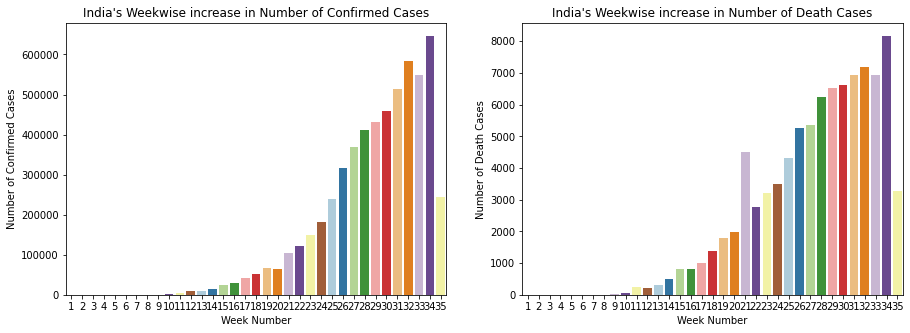

In [72]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_confirmed).diff().fillna(0),ax=ax1, palette='Paired')
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_deaths).diff().fillna(0),ax=ax2, palette='Paired')
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("India's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("India's Weekwise increase in Number of Death Cases")

Comparison of Daily Increase in Number of Cases of Italy, Nepal, USA and India, where maximum number of Confirmed Cases are equivalent to maximum number of Confirmed Cases in India

In [73]:
max_ind=datewise_india["Confirmed"].max()

print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in USA to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_Nepal[(datewise_Nepal["Confirmed"]>0)&(datewise_Nepal["Confirmed"]<=max_ind)].shape[0],"days in Nepal to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].index, y=datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)]["Confirmed"],
                    mode='lines',name="Italy"))
fig.add_trace(go.Scatter(x=datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].index, y=datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)]["Confirmed"],
                    mode='lines',name="USA"))
fig.add_trace(go.Scatter(x=datewise_Nepal[(datewise_Nepal["Confirmed"]>0)&(datewise_Nepal["Confirmed"]<=max_ind)].index, y=datewise_Nepal[(datewise_Nepal["Confirmed"]>0)&(datewise_Nepal["Confirmed"]<=max_ind)]["Confirmed"],
                    mode='lines',name="Nepal"))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Confirmed"],
                    mode='lines',name="India"))
fig.update_layout(title="Growth of Recovered Cases with respect to India",
                 xaxis_title="Date",yaxis_title="Number of Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


It took 237 days in Italy to reach number of Confirmed Cases equivalent to India
It took 213 days in USA to reach number of Confirmed Cases equivalent to India
It took 243 days in Nepal to reach number of Confirmed Cases equivalent to India
It took 238 days in India to reach 5646010.0 Confirmed Cases


#Data Analysis for USA


In [74]:
US_data=covid[covid["Country/Region"]=="US"]
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_US.iloc[-1])
print("Total Active Cases: ",datewise_US["Confirmed"].iloc[-1]-datewise_US["Recovered"].iloc[-1]-datewise_US["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_US["Recovered"].iloc[-1]+datewise_US["Deaths"].iloc[-1])


Confirmed    6933548.0
Recovered    2670256.0
Deaths        201884.0
Name: 2020-09-23 00:00:00, dtype: float64
Total Active Cases:  4061408.0
Total Closed Cases:  2872140.0


In [75]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_US.index, y=datewise_US["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_US.index, y=datewise_US["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.add_trace(go.Scatter(x=datewise_US.index, y=datewise_US["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.update_layout(title="Growth of different types of cases in US",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


In [76]:
fig=px.bar(x=datewise_US.index,y=datewise_US["Confirmed"]-datewise_US["Recovered"]-datewise_US["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases in US",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()


In [77]:
US_increase_confirm=[]
US_increase_recover=[]
US_increase_deaths=[]
for i in range(datewise_US.shape[0]-1):
    US_increase_confirm.append(((datewise_US["Confirmed"].iloc[i+1])/datewise_US["Confirmed"].iloc[i]))
    US_increase_recover.append(((datewise_US["Recovered"].iloc[i+1])/datewise_US["Recovered"].iloc[i]))
    US_increase_deaths.append(((datewise_US["Deaths"].iloc[i+1])/datewise_US["Deaths"].iloc[i]))
US_increase_confirm.insert(0,1)
US_increase_recover.insert(0,1)
US_increase_deaths.insert(0,1)


In [78]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_US.index, y=US_increase_confirm,
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_US.index, y=US_increase_recover,
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_US.index, y=US_increase_deaths,
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed cases in US",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


In [79]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_US.index, y=datewise_US["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_US.index, y=datewise_US["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.add_trace(go.Scatter(x=datewise_US.index, y=datewise_US["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))

fig.update_layout(title="Daily increase in different types of cases in US",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


In [80]:
datewise_US["WeekOfYear"]=datewise_US.index.weekofyear

week_num_US=[]
US_weekwise_confirmed=[]
US_weekwise_recovered=[]
US_weekwise_deaths=[]
w=1
for i in list(datewise_US["WeekOfYear"].unique()):
    US_weekwise_confirmed.append(datewise_US[datewise_US["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    US_weekwise_recovered.append(datewise_US[datewise_US["WeekOfYear"]==i]["Recovered"].iloc[-1])
    US_weekwise_deaths.append(datewise_US[datewise_US["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_US.append(w)
    w=w+1
    
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_US, y=US_weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num_US, y=US_weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.add_trace(go.Scatter(x=week_num_US, y=US_weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in US",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()



Text(0.5, 1.0, "US's Weekwise increase in Number of Death Cases")

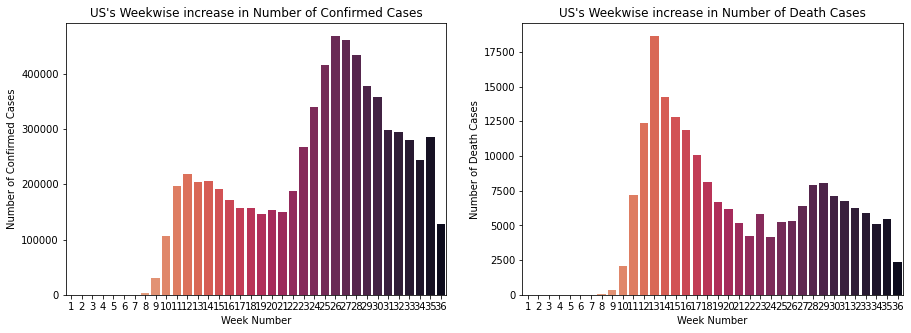

In [81]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num_US,y=pd.Series(US_weekwise_confirmed).diff().fillna(0),ax=ax1, palette='rocket_r')
sns.barplot(x=week_num_US,y=pd.Series(US_weekwise_deaths).diff().fillna(0),ax=ax2, palette='rocket_r')
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("US's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("US's Weekwise increase in Number of Death Cases")


#Corelations

In [82]:
!pip install pycountry_convert

     |████████████████████████████████| 10.1MB 4.8MB/s 
     |████████████████████████████████| 235kB 37.3MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=f902cd2d1ee536eeb58db6a487f7a7cb424c0a4d8c50be6a96648bc63cfebdf0
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.3 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1

In [83]:
!pip install folium

In [84]:
!pip install calmap

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
import calmap

from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
from keras import models
from keras.optimizers import RMSprop, Adam

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [86]:
# Retriving Dataset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Depricated
# df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [87]:
# new dataset 
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)
df_covid19.head(2)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,Afghanistan,2020-10-15 13:24:11,33.93911,67.709953,40026.0,1481.0,33447.0,5098.0,102.819691
1,Albania,2020-10-15 13:24:11,41.15330,20.168300,15955.0,434.0,9762.0,5759.0,554.416568


In [88]:
df_confirmed.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955


In [89]:
#Preprosessing the Data
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]


In [90]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"
# df_recovered.loc[df_recovered['country'] == "US", "country"] = "USA"


df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"
# df_recovered.loc[df_recovered['country'] == 'Korea, South', "country"] = 'South Korea'

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"
# df_recovered.loc[df_recovered['country'] == 'Taiwan*', "country"] = 'Taiwan'

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"
# df_recovered.loc[df_recovered['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"
# df_recovered.loc[df_recovered['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['country'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"
# df_recovered.loc[df_recovered['country'] == "Reunion", "country"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"
# df_recovered.loc[df_recovered['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['country'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"
# df_recovered.loc[df_recovered['country'] == 'Bahamas, The', "country"] = 'Bahamas'

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['country'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"
# df_recovered.loc[df_recovered['country'] == 'Gambia, The', "country"] = 'Gambia'

# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting Continent Information
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])
# df_recovered.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]] ) 

In [91]:
df_table = df_table[df_table["continent"] != "Others"]

In [92]:
df_deaths[df_deaths["continent" ]== 'Others']

,state,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20
34,NaN,Burma,Others,21.916200,95.956000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,12,14,14,14,16,24,32,39,46,61,75,81,94,100,116,133,155,174,198,226,256,284,310,321,353,371,412,444,471,510,535,566,598,646,664,693,732
102,NaN,Diamond Princess,Others,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,3,3,...,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
139,NaN,Holy See,Others,41.902900,12.453400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
156,NaN,Kosovo,Others,42.602636,20.902977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,556,563,568,568,574,581,586,589,596,600,601,604,607,611,614,614,615,615,616,616,617,619,622,625,625,625,627,627,630,630,633,635,638,638,638,645,647,648,649,650
168,NaN,MS Zaandam,Others,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
238,NaN,Timor-Leste,Others,-8.874217,125.727539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,West Bank and Gaza,Others,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,177,181,184,190,192,198,204,210,221,226,229,243,244,250,253,262,265,269,272,274,278,285,291,299,306,311,318,321,329,330,339,349,355,359,367,378,381,387,391,393
263,NaN,Western Sahara,Others,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [93]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

#General Analysis of Data

Getting Country wise and continent wise data

In [94]:

df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

df_countries_cases.fillna(0,inplace=True)
df_continents_cases.fillna(0,inplace=True)


#Global Reported Cases till Date (updated Live)



In [95]:
df_t = pd.DataFrame(pd.to_numeric(df_countries_cases.sum()),dtype=np.float64).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
0,38588292,1093359,26725746,10637996,115792.69,2.83


Country wise reported cases


In [96]:
# df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Wistia')
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
country,,,,,,
USA,7917389,216904,3155794,4544691,2403.10,2.74
India,7307097,111266,6383441,812390,529.50,1.52
Brazil,5140863,151747,4526393,462723,2418.55,2.95
Russia,1346380,23350,1043431,279599,922.59,1.73
Argentina,931967,24921,751146,155900,2062.07,2.67
Colombia,930159,28306,816667,85186,1828.04,3.04
Spain,908056,33413,150376,724267,1942.17,3.68
Peru,853974,33419,759597,60958,2590.01,3.91
Mexico,829396,84898,703489,41009,649.02,10.24


#Correlations Analysis

Plotting Heat map of correlation of confirmed cases, recovered cases, deaths and active cases.


In [97]:
df_countries_cases.iloc[:,:].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
Confirmed,1.000,0.932,0.937,0.786,0.239,0.025
Deaths,0.932,1.000,0.822,0.816,0.266,0.121
Recovered,0.937,0.822,1.000,0.522,0.209,0.013
Active,0.786,0.816,0.522,1.000,0.213,0.030
Incident_Rate,0.239,0.266,0.209,0.213,1.000,-0.074
Mortality Rate (per 100),0.025,0.121,0.013,0.030,-0.074,1.000


There is a huge corelationship between the number of Confirmed, Deaths, Recovered and Active caseses consecutively.

#Prediction using Machine Learning Models

Linear Regression Model to Confirm Cases Prediction

In [98]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [99]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.80)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.80):]
model_scores=[]

In [100]:
lin_reg=LinearRegression(normalize=True)

In [101]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [102]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [103]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  9738575.742226424


In [104]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

From the figure above we can see that the trend is not a Linear Regression.

Polynomial Regression for Prediction of Confirmed Cases

In [105]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.80)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.80):]

In [106]:
poly = PolynomialFeatures(degree = 8) 

In [107]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [108]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [109]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  24866625.903419036


In [110]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [111]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

Support Vector Machine Model Regressor for Prediction of Confirmed Cases

In [112]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.80)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.80):]

In [113]:
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [114]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [115]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [116]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  24555387.77507152


In [117]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

Support Vector Machine model too isn't providing great results

In [118]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [119]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly,new_prediction_svm),
                               columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction
0,2020-09-24,18024972.797009,104484420.095861,81641369.283815
1,2020-09-25,18113040.365078,110205878.147817,83603267.175823
2,2020-09-26,18201107.933147,116271764.392580,85605284.129062
3,2020-09-27,18289175.501216,122699923.253284,87648073.795767
4,2020-09-28,18377243.069285,129508933.267647,89732297.783217


Linear Regression is not not accurate enough to predict the actual values.

#Time Series Forecasting

Holt's Linear Model

In [120]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.80)]
valid=datewise.iloc[int(datewise.shape[0]*0.80):]
y_pred=valid.copy()

In [121]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

In [122]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  388665.96158105147


In [123]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [124]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2020-09-24,18024972.797009,104484420.095861,81641369.283815,31182962.118109
1,2020-09-25,18113040.365078,110205878.147817,83603267.175823,31430299.384522
2,2020-09-26,18201107.933147,116271764.392580,85605284.129062,31677636.650935
3,2020-09-27,18289175.501216,122699923.253284,87648073.795767,31924973.917348
4,2020-09-28,18377243.069285,129508933.267647,89732297.783217,32172311.183761


Holt's Winter Model for Daily Time Series

In [125]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.80)]
valid=datewise.iloc[int(datewise.shape[0]*0.80):]
y_pred=valid.copy()

In [126]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=14,trend='add', seasonal='mul').fit()

In [127]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  411381.003995738


In [128]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [129]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.80)]
valid=datewise.iloc[int(datewise.shape[0]*0.80):]
y_pred=valid.copy()

#AR Model (using Auto ARIMA)

In [130]:
model_ar= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=4,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

Fit ARIMA: order=(0, 2, 0); AIC=4371.528, BIC=4378.064, Fit time=0.008 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4341.858, BIC=4351.662, Fit time=0.082 seconds
Fit ARIMA: order=(2, 2, 0); AIC=4342.464, BIC=4355.535, Fit time=0.169 seconds
Fit ARIMA: order=(3, 2, 0); AIC=4322.318, BIC=4338.657, Fit time=0.227 seconds
Fit ARIMA: order=(4, 2, 0); AIC=4287.801, BIC=4307.408, Fit time=0.113 seconds
Total fit time: 0.608 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(4, 2, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [131]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [132]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  575958.4181652601


In [133]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [134]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,AR Model Prediction
0,2020-09-24,18024972.797009,104484420.095861,81641369.283815,31182962.118109,33267936.821785
1,2020-09-25,18113040.365078,110205878.147817,83603267.175823,31430299.384522,33590871.377445
2,2020-09-26,18201107.933147,116271764.392580,85605284.129062,31677636.650935,33915131.661949
3,2020-09-27,18289175.501216,122699923.253284,87648073.795767,31924973.917348,34240714.478518
4,2020-09-28,18377243.069285,129508933.267647,89732297.783217,32172311.183761,34567625.478037


MA Model (using AUTO ARIMA)

In [135]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.80)]
valid=datewise.iloc[int(datewise.shape[0]*0.80):]
y_pred=valid.copy()

In [136]:
model_ma= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=2,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["Confirmed"])

Fit ARIMA: order=(0, 2, 0); AIC=4371.528, BIC=4378.064, Fit time=0.003 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4330.411, BIC=4340.215, Fit time=0.032 seconds
Fit ARIMA: order=(0, 2, 2); AIC=4325.547, BIC=4338.618, Fit time=0.141 seconds
Total fit time: 0.184 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [137]:
prediction_ma=model_ma.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma

In [138]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))

Root Mean Square Error for MA Model:  526585.1482852123


In [139]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [140]:
MA_model_new_prediction=[]
for i in range(1,18):
    MA_model_new_prediction.append(model_ma.predict(len(valid)+i)[-1])
model_predictions["MA Model Prediction"]=MA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,AR Model Prediction,MA Model Prediction
0,2020-09-24,18024972.797009,104484420.095861,81641369.283815,31182962.118109,33267936.821785,33182653.876489
1,2020-09-25,18113040.365078,110205878.147817,83603267.175823,31430299.384522,33590871.377445,33503945.085466
2,2020-09-26,18201107.933147,116271764.392580,85605284.129062,31677636.650935,33915131.661949,33826553.354690
3,2020-09-27,18289175.501216,122699923.253284,87648073.795767,31924973.917348,34240714.478518,34150478.684158
4,2020-09-28,18377243.069285,129508933.267647,89732297.783217,32172311.183761,34567625.478037,34475721.073873


ARIMA Model (using AUTOARIMA)

In [141]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.80)]
valid=datewise.iloc[int(datewise.shape[0]*0.80):]
y_pred=valid.copy()

In [142]:
model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

Fit ARIMA: order=(1, 2, 1); AIC=4322.709, BIC=4335.781, Fit time=0.067 seconds
Fit ARIMA: order=(1, 2, 2); AIC=4324.537, BIC=4340.876, Fit time=0.102 seconds
Fit ARIMA: order=(1, 2, 3); AIC=4305.147, BIC=4324.754, Fit time=0.324 seconds
Fit ARIMA: order=(2, 2, 1); AIC=4323.884, BIC=4340.223, Fit time=0.110 seconds
Fit ARIMA: order=(2, 2, 2); AIC=4311.258, BIC=4330.865, Fit time=0.375 seconds
Fit ARIMA: order=(2, 2, 3); AIC=4255.232, BIC=4278.107, Fit time=0.389 seconds
Fit ARIMA: order=(3, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 3); AIC=4222.490, BIC=4248.633, Fit time=0.630 seconds
Total fit time: 2.072 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 2, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [143]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [144]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  748580.4414813897


In [145]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [146]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction
0,2020-09-24,18024972.797009,104484420.095861,81641369.283815,31182962.118109,33267936.821785,33182653.876489,33598329.690322
1,2020-09-25,18113040.365078,110205878.147817,83603267.175823,31430299.384522,33590871.377445,33503945.085466,33949181.788717
2,2020-09-26,18201107.933147,116271764.392580,85605284.129062,31677636.650935,33915131.661949,33826553.354690,34262994.860081
3,2020-09-27,18289175.501216,122699923.253284,87648073.795767,31924973.917348,34240714.478518,34150478.684158,34551840.143403
4,2020-09-28,18377243.069285,129508933.267647,89732297.783217,32172311.183761,34567625.478037,34475721.073873,34847697.101410


SARIMA Model (using AUTO ARIMA)

In [147]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 7); AIC=4361.628, BIC=4374.699, Fit time=0.194 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 7); AIC=4371.528, BIC=4378.064, Fit time=0.016 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 7); AIC=4266.313, BIC=4279.384, Fit time=0.506 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 7); AIC=4309.196, BIC=4322.267, Fit time=0.126 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 7); AIC=4341.697, BIC=4351.500, Fit time=0.030 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(2, 0, 0, 7); AIC=4252.662, BIC=4269.001, Fit time=1.066 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(2, 0, 1, 7); AIC=4278.229, BIC=4297.836, Fit time=0.571 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(2, 0, 0, 7); AIC=4354.219, BIC=4367.291, Fit time=0.143 seconds
Fit ARIMA: order=(2, 2, 0) seasonal_order=(2, 0, 0, 7); AIC=4273.429, BIC=4293.036, Fit time=0.380 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_o

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(2, 0, 0, 7), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [148]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [149]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  1073715.2531683824


In [150]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [151]:
SARIMA_model_new_prediction=[]
for i in range(1,18):
    SARIMA_model_new_prediction.append(model_sarima.predict(len(valid)+i)[-1])
model_predictions["SARIMA Model Prediction"]=SARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction
0,2020-09-24,18024972.797009,104484420.095861,81641369.283815,31182962.118109,33267936.821785,33182653.876489,33598329.690322,34295529.638477
1,2020-09-25,18113040.365078,110205878.147817,83603267.175823,31430299.384522,33590871.377445,33503945.085466,33949181.788717,34664044.448205
2,2020-09-26,18201107.933147,116271764.392580,85605284.129062,31677636.650935,33915131.661949,33826553.354690,34262994.860081,35022642.790179
3,2020-09-27,18289175.501216,122699923.253284,87648073.795767,31924973.917348,34240714.478518,34150478.684158,34551840.143403,35366145.690747
4,2020-09-28,18377243.069285,129508933.267647,89732297.783217,32172311.183761,34567625.478037,34475721.073873,34847697.101410,35708494.428635


Facebook Prophet Model for Forecasting

We will be using the open source software Prophet to forecast future Covid-19 cases. It provides reliable predictions as it is robust to shifts in the data and handles outliers. Our model for forecasting confirmed cases, deaths and recovered patients will be relatively straightforward as the data follows a polynomial trend.

In [152]:
prophet_c=Prophet(interval_width=0.80,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [153]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [154]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [155]:
confirmed_forecast=prophet_c.predict(forecast_c)
print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

            ds            yhat      yhat_lower      yhat_upper
0   2020-01-22   -14614.727595   -63114.935667    30207.353369
1   2020-01-23    -7889.259050   -54174.808455    37541.404254
2   2020-01-24     9725.063933   -40115.957981    62136.076249
3   2020-01-25    14274.749753   -35429.031206    59882.339787
4   2020-01-26     2110.033153   -43211.970611    48807.556193
..         ...             ...             ...             ...
258 2020-10-06 35005495.445064 34873671.395417 35139354.552906
259 2020-10-07 35274498.991570 35143860.374879 35436788.934222
260 2020-10-08 35540402.690202 35387149.782765 35714593.241641
261 2020-10-09 35817195.243272 35635391.317465 36012129.665339
262 2020-10-10 36080923.159180 35873182.477555 36301565.297043

[263 rows x 4 columns]


In [156]:
model_scores.append(np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  37359.72047579066


Figure(720x432)


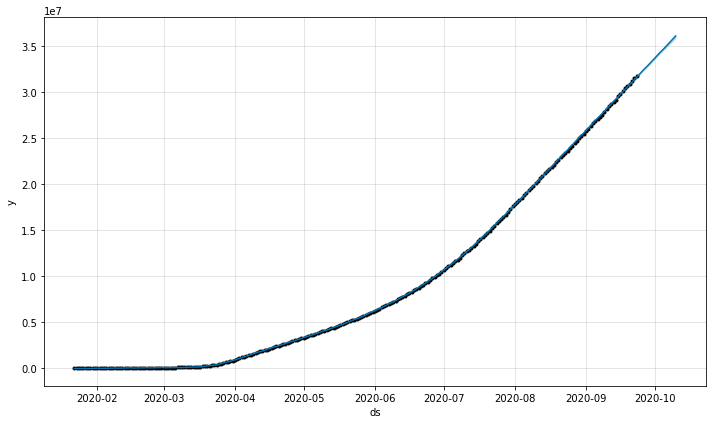

In [157]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


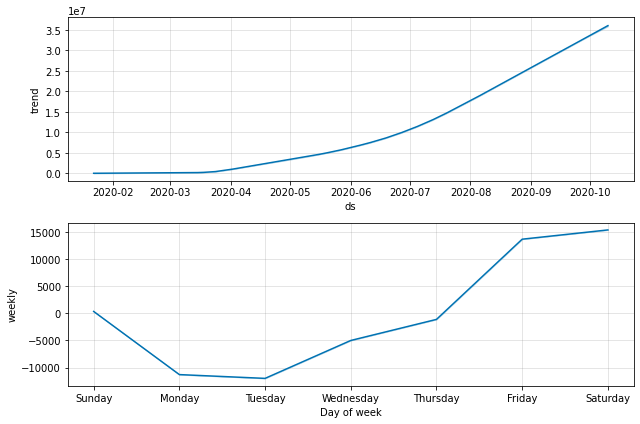

In [158]:
print(prophet_c.plot_components(confirmed_forecast))

Summarization of Forecasts using different Models

In [159]:
model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor","Holt's Linear","Holt's Winter Model",
            "Auto Regressive Model (AR)","Moving Average Model (MA)","ARIMA Model","SARIMA Model","Facebook's Prophet Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
9,Facebook's Prophet Model,37359.720476
3,Holt's Linear,388665.961581
4,Holt's Winter Model,411381.003996
6,Moving Average Model (MA),526585.148285
5,Auto Regressive Model (AR),575958.418165
7,ARIMA Model,748580.441481
8,SARIMA Model,1073715.253168
0,Linear Regression,9738575.742226
2,Support Vector Machine Regressor,24555387.775072
1,Polynomial Regression,24866625.903419


In [160]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2020-09-24,18024972.797009,104484420.095861,81641369.283815,31182962.118109,33267936.821785,33182653.876489,33598329.690322,34295529.638477,31872081.822172,31918149.929925
1,2020-09-25,18113040.365078,110205878.147817,83603267.175823,31430299.384522,33590871.377445,33503945.085466,33949181.788717,34664044.448205,32148874.375242,32198422.152654
2,2020-09-26,18201107.933147,116271764.392580,85605284.129062,31677636.650935,33915131.661949,33826553.354690,34262994.860081,35022642.790179,32412602.291150,32465748.188453
3,2020-09-27,18289175.501216,122699923.253284,87648073.795767,31924973.917348,34240714.478518,34150478.684158,34551840.143403,35366145.690747,32659615.804637,32713749.401601
4,2020-09-28,18377243.069285,129508933.267647,89732297.783217,32172311.183761,34567625.478037,34475721.073873,34847697.101410,35708494.428635,32910009.155669,32966054.989955


From here we can see that Auto Regressive Model (AR) has the highest accurracy due to it's lowest Root Mean Squared Error.


#Timeseries Forecasting for Death Cases

In [161]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Death Cases"))
fig.update_layout(title="Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Facebook Prophet for Death Cases

In [162]:
prophet_d=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_deaths=pd.DataFrame(zip(list(datewise.index),list(datewise["Deaths"])),columns=['ds','y'])

In [163]:
prophet_d.fit(prophet_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [164]:
forecast_d=prophet_d.make_future_dataframe(periods=17)
forecast_deaths=forecast_d.copy()

In [165]:
deaths_forecast=prophet_d.predict(forecast_d)
print(deaths_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

            ds           yhat     yhat_lower     yhat_upper
0   2020-01-22    -469.684582   -2955.242542    1769.885059
1   2020-01-23     221.163869   -1958.387456    2481.003219
2   2020-01-24     712.779139   -1686.995548    2904.341808
3   2020-01-25     531.082373   -1970.713354    2938.368875
4   2020-01-26    -445.582106   -2624.693413    1901.955479
..         ...            ...            ...            ...
258 2020-10-06 1048448.623924 1032348.500827 1063060.750620
259 2020-10-07 1054528.943906 1037523.346488 1071159.142255
260 2020-10-08 1060607.870769 1041723.727046 1078553.471711
261 2020-10-09 1066487.564452 1046080.108378 1086686.243962
262 2020-10-10 1071693.946099 1049733.103671 1093825.057442

[263 rows x 4 columns]


In [166]:
model_scores.append(np.sqrt(mean_squared_error(datewise["Deaths"],deaths_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Deaths"],deaths_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  1185.7123478701126


Figure(720x432)


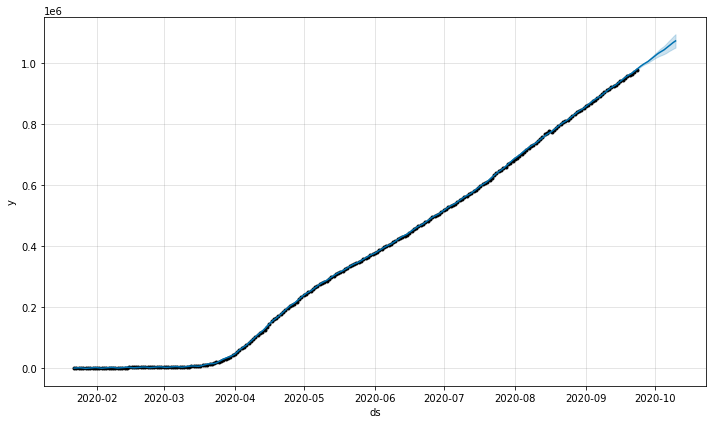

In [167]:
print(prophet_d.plot(deaths_forecast))

Figure(648x432)


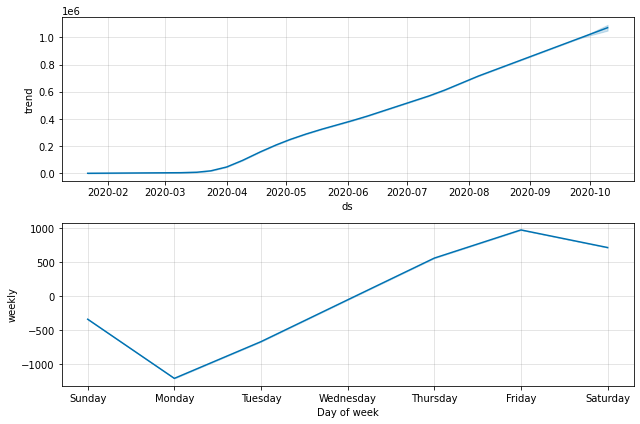

In [168]:
print(prophet_d.plot_components(deaths_forecast))

As the Facebook Prophet model Root Mean Squared Error is the lowest among both, we can project our data using Facebook Prophet model.




In [169]:



#pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions_d=pd.DataFrame(zip(new_date,deaths_forecast["yhat"].tail(17),deaths_forecast["yhat_upper"].tail(17)),
                               columns=["Dates","Prophet's Prediction","Prophet's Upper Bound"])
model_predictions_d.head()



,Dates,Prophet's Prediction,Prophet's Upper Bound
0,2020-09-24,984092.912228,986368.879188
1,2020-09-25,989972.605911,992369.245965
2,2020-09-26,995178.987558,997958.325139
3,2020-09-27,999590.401491,1002883.984526
4,2020-09-28,1004185.733552,1008120.439432
